In [1]:
import numpy as np
np.random.seed(777)

# Input data generate

In [2]:
def generate_linear(n=100):
    import numpy as np
    pts = np.random.uniform(0,1,(n,2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n,1)

def generate_XOR_easy():
    import numpy as np
    inputs = []
    labels = []

    for i in range(11):
       inputs.append([0.1*i,0.1*i])
       labels.append(0)

       if 0.1*i == 0.5:
           continue
       inputs.append([0.1*i,1-0.1*i])
       labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21,1)



In [3]:
def relu(x):
    return np.maximum(0,x)

def derivate_relu(x):
    return np.where(x > 0, 1 , 0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivate_sigmoid(x):
    return np.multiply(x, 1.0 - x)

def MSE(y,y_pred):
    return np.mean((y_pred-y)**2)

def derivate_MSE(y,y_pred):
    return 2*(y_pred-y)/len(y_pred)

In [4]:
def show_result(x, y, pred_y):
    import matplotlib.pyplot as plt
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0: 
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0 :
            plt.plot(x[i][0],x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.show()

In [5]:
def learn_curve(epochs,train_loss):
    import matplotlib.pyplot as plt
    plt.plot(epochs, train_loss, 'b-', )
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

In [6]:
class nn_moodel():
    def __init__(self , input_features = 2 , hidden_features_1 = 3 , hidden_features_2 = 3 , out_features = 1 ,lr= 1,activate_function = "sigmoid" , optimizer = "GD",beta = 0.9) :
        self.weight_1 = np.random.normal(0 , 1 , (input_features , hidden_features_1))
        self.weight_2 = np.random.normal(0 , 1 , (hidden_features_1, hidden_features_2))
        self.weight_3 = np.random.normal(0 , 1 ,(hidden_features_2, out_features))
        self.lr = lr
        self.activate = activate_function
        self.op = optimizer
        if self.op == 'momentum':
            self.beta = beta 
            self.velocity_1 = np.zeros_like(self.weight_1)
            self.velocity_2 = np.zeros_like(self.weight_2)
            self.velocity_3 = np.zeros_like(self.weight_3)
    def activate_function(self,x):
        if self.activate == 'sigmoid':
            y = sigmoid(x)
        else:
            y = relu(x)
        return y
    def derivate_activate_function(self,x):
        if self.activate == 'sigmoid':
            y = derivate_sigmoid(x)
        else:
            y = derivate_relu(x)
        return y
    def feed_forward(self, x):
        self.x = x
        self.z_1 = np.dot(x,self.weight_1)
        self.a_1 = self.activate_function(self.z_1)
        self.z_2 = np.dot(self.a_1,self.weight_2)
        self.a_2 = self.activate_function(self.z_2)
        self.z_3 = np.dot(self.a_2,self.weight_3)
        self.y_pred = sigmoid(self.z_3)
    
        return self.y_pred 

    def back_propagation(self , y_gt):
        self.dc_dy = derivate_MSE(y_gt, self.y_pred)
        self.dy_dz3 = derivate_sigmoid(self.y_pred)
        self.dz3_dw3 = self.a_2
        self.dc_dz3 =self.dy_dz3 * self.dc_dy
        self.dc_dw3 = self.dz3_dw3.T @ self.dc_dz3
        
        self.dz2_dw2 = self.a_1
        self.dz3_da2 = self.weight_3
        self.dc_da2 = self.dz3_da2 @ self.dc_dz3.T
        self.dc_dz2 = self.derivate_activate_function(self.a_2) * self.dc_da2.T
        self.dc_dw2 = self.dz2_dw2.T @ self.dc_dz2
        

        self.dz1_dw1 = self.x
        self.dz2_da1 = self.weight_2
        self.dc_da1 = self.dz2_da1 @ self.dc_dz2.T
        self.dc_dz1 = self.derivate_activate_function(self.a_1) * self.dc_da1.T
        self.dc_dw1 = self.dz1_dw1.T @ self.dc_dz1

        #update
        if self.op == 'momentum':
            self.velocity_1 = self.velocity_1 * self.beta - self.lr*self.dc_dw1
            self.weight_1 = self.weight_1 + self.velocity_1
            self.velocity_2 = self.velocity_2 * self.beta - self.lr*self.dc_dw2
            self.weight_2 = self.weight_2 + self.velocity_2
            self.velocity_3 = self.velocity_3 * self.beta - self.lr*self.dc_dw3
            self.weight_3 = self.weight_3 + self.velocity_3
        else:
            self.weight_1 -= self.lr*self.dc_dw1
            self.weight_2 -= self.lr*self.dc_dw2
            self.weight_3 -= self.lr*self.dc_dw3

def train_model(x,y,model,epochs= 100000):
    losses = []
    epoches = []
    for epoch in range(epochs):
        y_pred = model.feed_forward(x)
        model.back_propagation(y)
        loss = MSE(y,y_pred)
        losses.append(loss)
        epoches.append(epoch)
        if (epoch+1) % 5000 == 0:
            print(f'epoch {epoch+1} loss : {loss:.6f}')
    y_pred = model.feed_forward(x)
    print(y_pred)
    test_loss = MSE(y,y_pred)
    print(f'test loss: {test_loss}')
    y_pred = np.where(y_pred > 0.5 ,1 ,0)
    learn_curve(epoches,losses)
    show_result(x,y,y_pred)
    print(f'accuracy {np.sum(y_pred == y)/len(y_pred)*100}%')




# XOR

epoch 5000 loss : 0.082498
epoch 10000 loss : 0.000591
epoch 15000 loss : 0.000271
epoch 20000 loss : 0.000174
epoch 25000 loss : 0.000128
epoch 30000 loss : 0.000101
epoch 35000 loss : 0.000083
epoch 40000 loss : 0.000071
epoch 45000 loss : 0.000061
epoch 50000 loss : 0.000054
epoch 55000 loss : 0.000049
epoch 60000 loss : 0.000044
epoch 65000 loss : 0.000040
epoch 70000 loss : 0.000037
epoch 75000 loss : 0.000034
epoch 80000 loss : 0.000032
epoch 85000 loss : 0.000030
epoch 90000 loss : 0.000028
epoch 95000 loss : 0.000026
epoch 100000 loss : 0.000025
[[0.00408685]
 [0.99696112]
 [0.00465427]
 [0.99699113]
 [0.00522982]
 [0.99703353]
 [0.00559214]
 [0.99703985]
 [0.00559036]
 [0.9912196 ]
 [0.00527107]
 [0.00479785]
 [0.98928315]
 [0.00431288]
 [0.99588093]
 [0.00388782]
 [0.99607942]
 [0.00354169]
 [0.99611598]
 [0.00326872]
 [0.99612925]]
test loss: 2.5056681264530637e-05


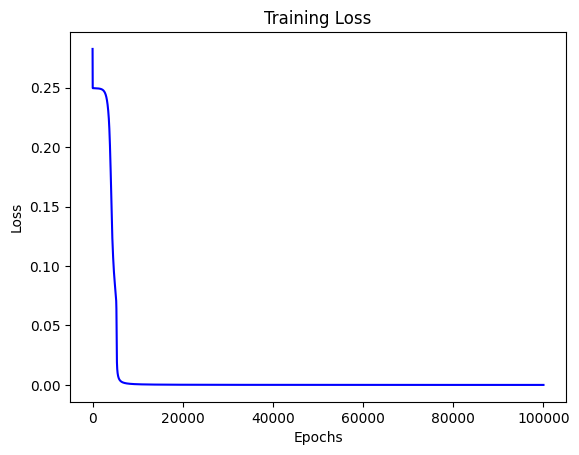

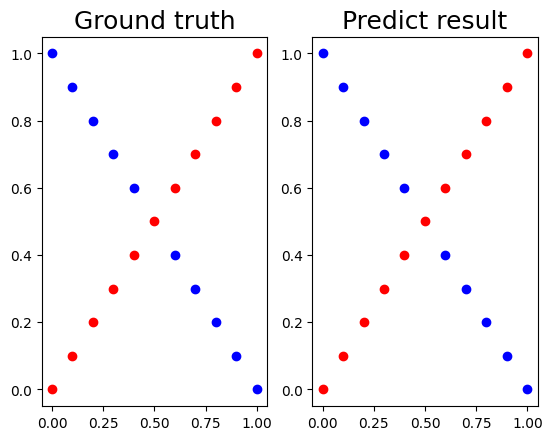

accuracy 100.0%


In [7]:

x,y = generate_XOR_easy()
model =nn_moodel()
train_model(x,y,model)

# linear

epoch 5000 loss : 0.008171
epoch 10000 loss : 0.003875
epoch 15000 loss : 0.002166
epoch 20000 loss : 0.001301
epoch 25000 loss : 0.000845
epoch 30000 loss : 0.000590
epoch 35000 loss : 0.000436
epoch 40000 loss : 0.000337
epoch 45000 loss : 0.000270
epoch 50000 loss : 0.000222
epoch 55000 loss : 0.000187
epoch 60000 loss : 0.000161
epoch 65000 loss : 0.000140
epoch 70000 loss : 0.000123
epoch 75000 loss : 0.000110
epoch 80000 loss : 0.000098
epoch 85000 loss : 0.000089
epoch 90000 loss : 0.000081
epoch 95000 loss : 0.000075
epoch 100000 loss : 0.000069
epoch 105000 loss : 0.000064
epoch 110000 loss : 0.000059
epoch 115000 loss : 0.000055
epoch 120000 loss : 0.000052
epoch 125000 loss : 0.000049
epoch 130000 loss : 0.000046
epoch 135000 loss : 0.000043
epoch 140000 loss : 0.000041
epoch 145000 loss : 0.000039
epoch 150000 loss : 0.000037
epoch 155000 loss : 0.000035
epoch 160000 loss : 0.000034
epoch 165000 loss : 0.000032
epoch 170000 loss : 0.000031
epoch 175000 loss : 0.000030
epoch

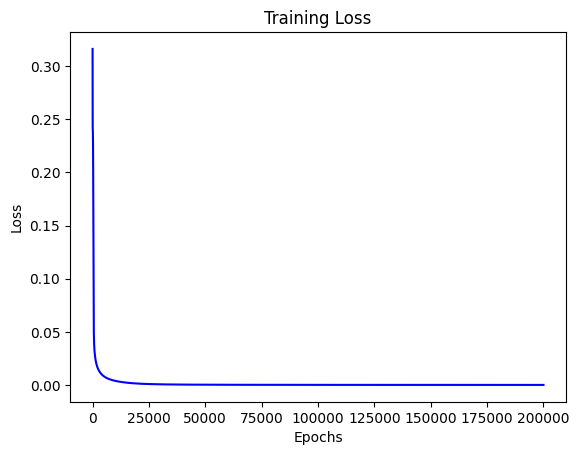

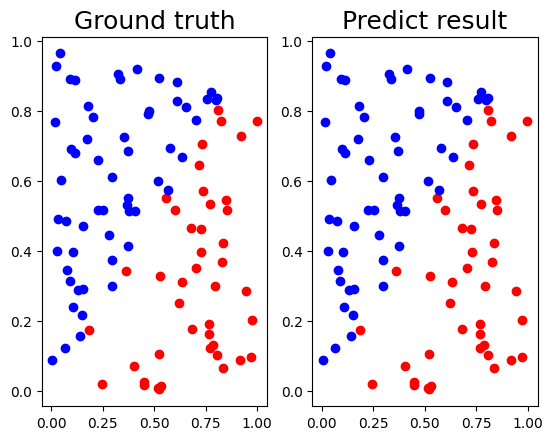

accuracy 100.0%


In [8]:

x,y = generate_linear(100)
model =nn_moodel()
train_model(x,y,model,epochs=200000)